# Extraction des données

In [384]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
import numpy as np

## Extraction les liens de statistiques des clubs

In [382]:
def extract_clubs(url,season,dir):
    os.mkdir(f"{dir}/{season}")
    data=requests.get(url)
    soup=BeautifulSoup(data.text)
    table_equipes=soup.select('tbody')[0]
    tags_a=table_equipes.find_all('a')
    liens=[tag.get('href') for tag in tags_a]
    liens=[lien for lien in liens if '/squads/' in lien]
    liens=[f"https://fbref.com{lien}" for lien in liens]
    liens=[[lien.split("/")[-1],lien] for lien in liens]
    print(liens)
    header=['equipe','lien']
    f = pd.DataFrame(liens, columns=header)
    f.to_csv(f"{dir}/{season}/listeEquipes.csv")
    return f

In [383]:
saison=extract_clubs("https://fbref.com/en/comps/9/2020-2021/2020-2021-Premier-League-Stats","2020-2021",".")

FileExistsError: [WinError 183] Cannot create a file when that file already exists: './2020-2021'

## Extraction statistiques de chaque match 

In [ ]:
def statistique_matches(url,club,dir):
    req=requests.get(url)
    soup=BeautifulSoup(req.text)
    table_matchs=soup.select("table.stats_table")[1]
    header=[td.get_text() for td in table_matchs.select("thead tr th")]
    matches=[[element.get_text() for element in row] for row in table_matchs.select("tbody tr")]
    df = pd.DataFrame(matches, columns=header)
    liens_rapports=[]
    for ele in table_matchs.select("tbody tr"):
        liens_rapports.append("https://fbref.com"+ele.select("td")[-2].select('a')[0].get('href'))
    df['Match Report']=liens_rapports
    df=df[df["Comp"]=="Premier League"]
    df.to_csv(f"{dir}/{club}.csv")
    return df

In [ ]:
season="./2021-2022"
for index,row in saison.iterrows():
    os.mkdir(f"{season}/{row['equipe']}")
    # statistique globale
    stat=statistique_matches(row['lien'],row['equipe'],f"{season}/{row['equipe']}")
    equipe=row['equipe']
    print(equipe)

## Performence des joueurs

In [ ]:
def performence(url,camp,dir):
    stat_=["summary","passing","passing types","defense","possession","miscellaneous stats"]
    html=pd.read_html(url)
    if camp == "Home" :
        for name,index in zip(stat_, range(3,9)):
            html[index].to_csv(f"{dir}/{name}.csv")
    else:
        for name,index in zip(stat_, range(10,16)):
            html[index].to_csv(f"{dir}/{name}.csv")


In [ ]:
dir="./2021-2022/"
exception_pp=[]
equipes=os.listdir(dir)
for equipe in equipes:
    if "Stats" in equipe:
        try:
            statistiques=pd.read_csv(f"{dir}{equipe}/{equipe}.csv")
            print(equipe)
            print("-------")
            for index,round in statistiques.iterrows():
                matchweek=round['Round']
                try:
                    if "History" not in round['Match Report']:
                        performence(round['Match Report'],round['Venue'],f"{dir}{equipe}/{matchweek}")
                        print(matchweek)
                        time.sleep(2)
                except:
                    exception_pp.append([equipe,matchweek,round['Match Report']])
                    print("ERREUR : "+matchweek)
        except:
            pass
header=["team","matchweek","Match Report"]
erreur_pp = pd.DataFrame(exception_pp, columns=header)
erreur_pp.to_csv(f"{dir}/erreur_pp.csv")

# Préparation des données

## Assembler les résultats des matches de tous les saisons

In [ ]:
# def concat_season():
#     seasons=os.listdir(".")
#     header=["Date","Time","Comp","Round","Day","Venue","Result","GF","GA","Opponent","Poss","Attendance","Captain","Formation","Referee","Match Report","Notes","team","season"]
#     data=pd.DataFrame(columns=header)
#     for season in seasons:
#         if "-" in season:
#             equipes=os.listdir(f"./{season}")
#             for equipe in equipes:
#                 if "Stats" in equipe:
#                     matchweeks=os.listdir(f"./{season}/{equipe}")
#                     fils=pd.read_csv(f"./{season}/{equipe}/{equipe}.csv")
#                     fils["team"]= " ".join(equipe.split("-")[:-1])
#                     fils["season"]=season.split("-")[0]
#                     data=pd.concat([data, fils], ignore_index=True)
#     data.to_csv("dataset.csv")
#     return data

In [ ]:

# data=concat_season()

In [385]:
data=pd.read_csv("./matches.csv")

In [386]:
data

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,...,Match Report,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
1,2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,...,Match Report,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
2,3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,...,Match Report,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
3,4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,...,Match Report,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
4,6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,...,Match Report,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,38,2021-05-02,19:15,Premier League,Matchweek 34,Sun,Away,L,0.0,4.0,...,Match Report,NaN,8.0,1.0,17.4,0.0,0.0,0.0,2021,Sheffield United
1385,39,2021-05-08,15:00,Premier League,Matchweek 35,Sat,Home,L,0.0,2.0,...,Match Report,NaN,7.0,0.0,11.4,1.0,0.0,0.0,2021,Sheffield United
1386,40,2021-05-16,19:00,Premier League,Matchweek 36,Sun,Away,W,1.0,0.0,...,Match Report,NaN,10.0,3.0,17.0,0.0,0.0,0.0,2021,Sheffield United
1387,41,2021-05-19,18:00,Premier League,Matchweek 37,Wed,Away,L,0.0,1.0,...,Match Report,NaN,11.0,1.0,16.0,1.0,0.0,0.0,2021,Sheffield United


## Vérifier les valeurs manquants

In [387]:
data.isna().sum()

Unnamed: 0         0
date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg                 0
xga                0
poss               0
attendance       696
captain            0
formation          0
referee            0
match report       0
notes           1389
sh                 0
sot                0
dist               1
fk                 0
pk                 0
pkatt              0
season             0
team               0
dtype: int64

In [388]:
data=data.drop(["match report","notes","attendance","poss","captain","xg","xga"],axis=1)

## Encoder les valeurs non numériques

In [389]:
from sklearn.preprocessing import LabelEncoder

### Venue

In [390]:
data["Venue_code"]=data["venue"].astype("category").cat.codes

### Resultat

In [391]:
resultat_encoder=LabelEncoder()
data["result_code"]=resultat_encoder.fit_transform(data["result"])

### Round

In [392]:
round_encoder=LabelEncoder()
data["round_code"]=round_encoder.fit_transform(data["round"])

### Formation

In [393]:
Formation_encoder=LabelEncoder()
data["formation_code"]=Formation_encoder.fit_transform(data["formation"])

### Referee

In [394]:
Referee_encoder=LabelEncoder()
data["referee_code"]=Referee_encoder.fit_transform(data["referee"])

### Day

In [395]:
data["date"]=pd.to_datetime(data["date"])

In [396]:
data["day_code"]=data["date"].dt.dayofweek

### Team and Opponent

In [397]:
data["team"]=data["team"].replace("Blackburn Rovers","Blackburn")
data["team"]=data["team"].replace("Bolton Wanderers","Bolton")
data["team"]=data["team"].replace("Manchester United","Manchester Utd")
data["team"]=data["team"].replace("Newcastle United","Newcastle Utd")
data["team"]=data["team"].replace("Tottenham Hotspur","Tottenham")
data["team"]=data["team"].replace("West Bromwich Albion","West Brom")
data["team"]=data["team"].replace("West Ham United","West Ham")
data["team"]=data["team"].replace("Wolverhampton Wanderers","Wolves")
data["team"]=data["team"].replace("Queens Park Rangers","QPR")
data["team"]=data["team"].replace("Brighton and Hove Albion","Brighton")
data["team"]=data["team"].replace("Huddersfield Town","Huddersfield")
data["team"]=data["team"].replace("Sheffield United","Sheffield Utd")
data["team"]=data["team"].replace("Nottingham Forest","Nott'ham Forest")



In [398]:
label_encoder = LabelEncoder()
data["Opponent_code"] = label_encoder.fit_transform(data["opponent"])
data["team_code"] = label_encoder.transform(data["team"])

# Feature Engineering

In [399]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group

## AVG G

In [400]:
matches_rolling_=data.copy()
win=matches_rolling_["result_code"].replace([1,0],0)
win=win.replace(2,1)

In [401]:
matches_rolling_=data.copy()
lose=matches_rolling_["result_code"].replace([0,2],0)

In [402]:
matches_rolling_=data.copy()
draw=matches_rolling_["result_code"].replace([1,2],11)
draw=draw.replace(0,1)
draw=draw.replace(11,0)

In [403]:
data["win"]=win
data["draw"]=draw
data["lose"]=lose


## Avr Goals

In [404]:
grouped_matches = data.groupby("team")

In [405]:
cols = ["gf", "ga", "sh", "sot", "dist", "fk", "pk", "pkatt","win","lose","draw"]
new_cols = [f"{c}_rolling" for c in cols]

In [406]:
matches_rolling = data.groupby("team").apply(lambda x: rolling_averages(x, cols, new_cols))

In [407]:
matches_rolling = matches_rolling.droplevel('team')

In [408]:
dataCleaned=matches_rolling[['date','team',"round",'Venue_code', 'round_code', 'formation_code',
       'referee_code', 'day_code', 'Opponent_code', 'team_code', 'gf_rolling', 'ga_rolling', 'sh_rolling', 'sot_rolling',
       'dist_rolling', 'fk_rolling', 'pk_rolling', 'pkatt_rolling',
       'win_rolling', 'lose_rolling', 'draw_rolling','season', 'result',"result_"]]


KeyError: "['result_'] not in index"

In [409]:
dataCleaned

,date,team,round,Venue_code,round_code,formation_code,referee_code,day_code,Opponent_code,team_code,...,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling,win_rolling,lose_rolling,draw_rolling,season,result
898,2020-10-04,Arsenal,Matchweek 4,1,32,10,12,6,16,0,...,3.666667,14.733333,0.666667,0.000000,0.000000,0.666667,0.333333,0.0,2021,W
899,2020-10-17,Arsenal,Matchweek 5,0,33,1,3,5,12,0,...,3.666667,15.766667,0.000000,0.000000,0.000000,0.666667,0.333333,0.0,2021,L
900,2020-10-25,Arsenal,Matchweek 6,1,34,1,4,6,10,0,...,3.666667,16.733333,0.666667,0.000000,0.000000,0.333333,0.666667,0.0,2021,L
901,2020-11-01,Arsenal,Matchweek 7,0,35,1,16,6,13,0,...,4.000000,16.033333,1.000000,0.000000,0.000000,0.333333,0.666667,0.0,2021,W
902,2020-11-08,Arsenal,Matchweek 8,1,36,1,13,6,1,0,...,2.666667,18.033333,1.000000,0.333333,0.333333,0.333333,0.666667,0.0,2021,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,2022-03-13,Wolves,Matchweek 29,0,21,4,14,6,7,22,...,3.666667,19.300000,0.000000,0.000000,0.000000,0.333333,0.666667,0.0,2022,W
228,2022-03-18,Wolves,Matchweek 30,1,23,1,11,4,9,22,...,4.333333,19.600000,0.000000,0.000000,0.000000,0.666667,0.333333,0.0,2022,L
229,2022-04-02,Wolves,Matchweek 31,1,24,1,5,5,1,22,...,5.333333,19.833333,0.000000,0.000000,0.000000,0.666667,0.333333,0.0,2022,W
230,2022-04-08,Wolves,Matchweek 32,0,25,1,18,4,14,22,...,5.000000,18.533333,0.000000,0.000000,0.000000,0.666667,0.333333,0.0,2022,L


In [410]:
dataCleaned.to_csv("dataCleaned_.csv")

PermissionError: [Errno 13] Permission denied: 'dataCleaned_.csv'

# Visualisation

In [411]:
dt=pd.read_csv("./matches.csv")
dt=dt.drop("Unnamed: 0",axis=1)

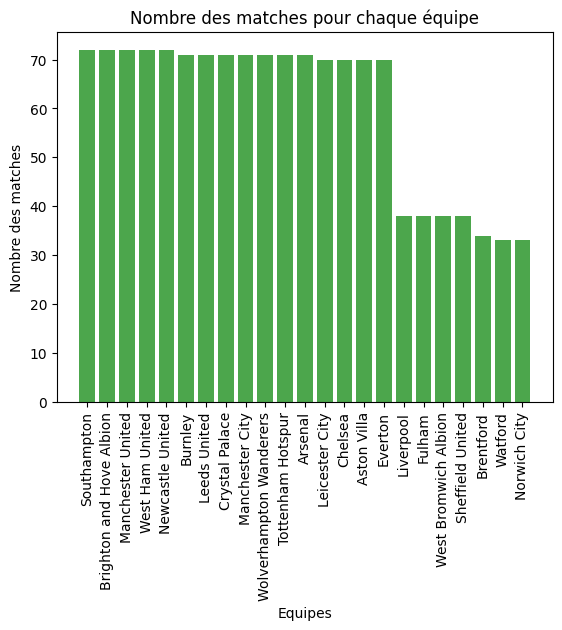

In [412]:
matches=dt["team"].value_counts()
plt.bar(matches.index, matches.values, color='green', alpha=0.7)
plt.xlabel('Equipes')
plt.ylabel('Nombre des matches')
plt.title('Nombre des matches pour chaque équipe')
plt.xticks(rotation='vertical')
plt.show()

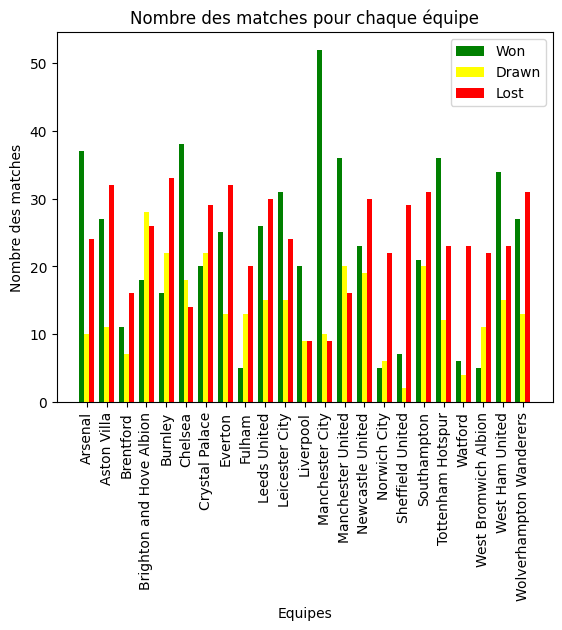

In [413]:
result_counts = dt.groupby(['team', 'result']).size().unstack(fill_value=0)
result_df = pd.DataFrame(result_counts)
result_df.reset_index(inplace=True)
result_df.columns = ['Team', 'Draw', 'Loss', 'Win']
bar_width = 0.25
plt.bar(np.arange(result_df["Team"].size) - bar_width, result_df["Win"], width=bar_width, color='green', label='Won')
plt.bar(np.arange(result_df["Team"].size), result_df["Draw"], width=bar_width, color='yellow', label='Drawn')
plt.bar(np.arange(result_df["Team"].size) + bar_width, result_df["Loss"], width=bar_width, color='red', label='Lost')
plt.xlabel('Equipes')
plt.ylabel('Nombre des matches')
plt.title('Nombre des matches pour chaque équipe')
plt.xticks(np.arange(result_df["Team"].size), result_df["Team"])
plt.xticks(rotation='vertical')
plt.legend()
plt.show()


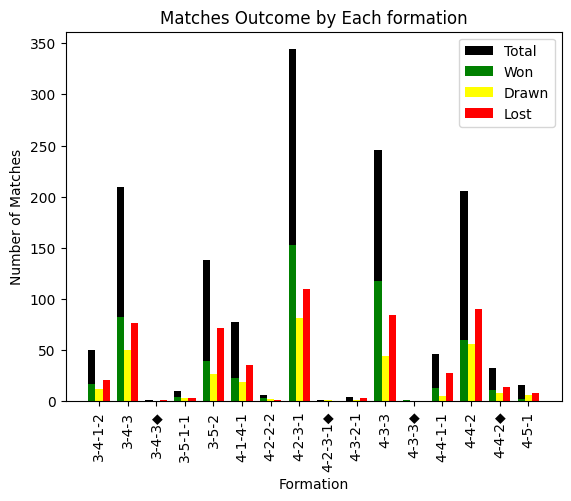

In [414]:
dt_=dt[["formation"]].value_counts()
dt_=dt_.sort_index()
result_counts = dt.groupby(['formation', 'result']).size().unstack(fill_value=0)
result_df = pd.DataFrame(result_counts)
result_df.reset_index(inplace=True)
result_df.columns = ['Formation', 'Draw', 'Loss', 'Win']
result_df=result_df.sort_values("Formation")
bar_width = 0.25
plt.bar(np.arange(dt_.size) - bar_width, dt_.values, width=bar_width, color='black', label='Total')
plt.bar(np.arange(result_df["Formation"].size) - bar_width, result_df["Win"], width=bar_width, color='green', label='Won')
plt.bar(np.arange(result_df["Formation"].size), result_df["Draw"], width=bar_width, color='yellow', label='Drawn')
plt.bar(np.arange(result_df["Formation"].size) + bar_width, result_df["Loss"], width=bar_width, color='red', label='Lost')
plt.xlabel('Formation')
plt.ylabel('Number of Matches')
plt.title('Matches Outcome by Each formation')
plt.xticks(np.arange(result_df["Formation"].size), result_df["Formation"])
plt.xticks(rotation='vertical')
plt.legend()
plt.show()


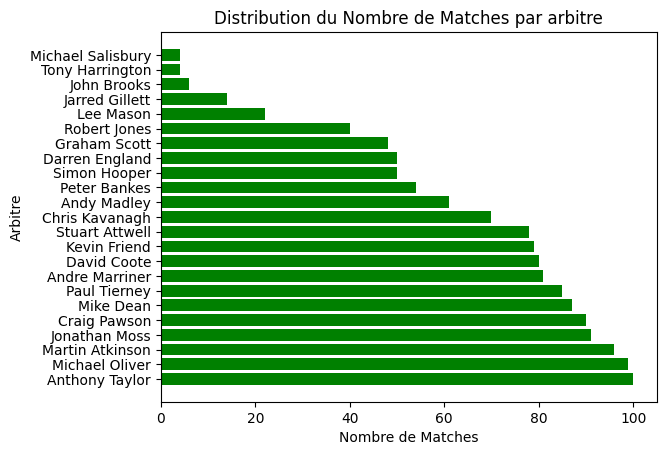

In [415]:
dt_2=dt["referee"].value_counts()
plt.barh(dt_2.index, dt_2.values, color='green')
plt.xlabel('Nombre de Matches')
plt.ylabel('Arbitre')
plt.title('Distribution du Nombre de Matches par arbitre')
plt.show()


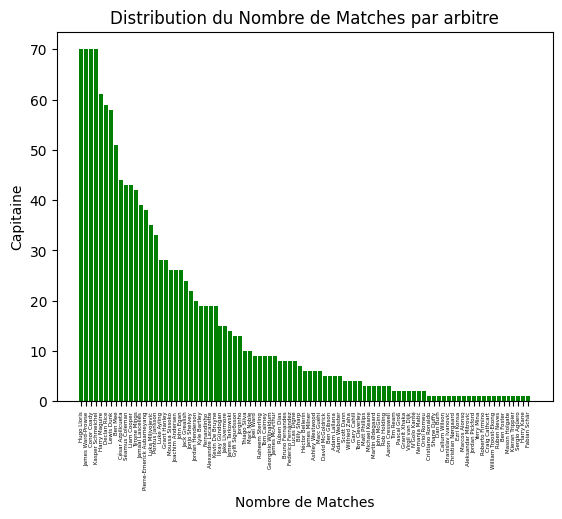

In [416]:
dt_3=dt["captain"].value_counts()
plt.bar(dt_3.index, dt_3.values, color='green')
plt.xlabel('Nombre de Matches')
plt.ylabel('Capitaine')
plt.title('Distribution du Nombre de Matches par arbitre')
plt.xticks(rotation='vertical',fontsize=4)
plt.show()


# Entrainement des modeles

# Importer dataset

In [417]:
dt=pd.read_csv("./dataCleaned.csv")

In [418]:
dt

,Unnamed: 0,date,team,round,Venue_code,round_code,formation_code,referee_code,day_code,Opponent_code,...,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling,win_rolling,lose_rolling,draw_rolling,season,result,result_
0,898,2020-10-04,Arsenal,Matchweek 4,1,32,10,12,6,16,...,14.733333,0.666667,0.000000,0.000000,0.666667,0.333333,0.0,2021,W,1
1,899,2020-10-17,Arsenal,Matchweek 5,0,33,1,3,5,12,...,15.766667,0.000000,0.000000,0.000000,0.666667,0.333333,0.0,2021,L,0
2,900,2020-10-25,Arsenal,Matchweek 6,1,34,1,4,6,10,...,16.733333,0.666667,0.000000,0.000000,0.333333,0.666667,0.0,2021,L,0
3,901,2020-11-01,Arsenal,Matchweek 7,0,35,1,16,6,13,...,16.033333,1.000000,0.000000,0.000000,0.333333,0.666667,0.0,2021,W,1
4,902,2020-11-08,Arsenal,Matchweek 8,1,36,1,13,6,1,...,18.033333,1.000000,0.333333,0.333333,0.333333,0.666667,0.0,2021,L,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,227,2022-03-13,Wolves,Matchweek 29,0,21,4,14,6,7,...,19.300000,0.000000,0.000000,0.000000,0.333333,0.666667,0.0,2022,W,1
1313,228,2022-03-18,Wolves,Matchweek 30,1,23,1,11,4,9,...,19.600000,0.000000,0.000000,0.000000,0.666667,0.333333,0.0,2022,L,0
1314,229,2022-04-02,Wolves,Matchweek 31,1,24,1,5,5,1,...,19.833333,0.000000,0.000000,0.000000,0.666667,0.333333,0.0,2022,W,1
1315,230,2022-04-08,Wolves,Matchweek 32,0,25,1,18,4,14,...,18.533333,0.000000,0.000000,0.000000,0.666667,0.333333,0.0,2022,L,0


In [419]:
dt=dt.drop(["Unnamed: 0","team","round"],axis=1)

## Diviser l'ensemble de données

In [420]:
train = dt[dt["date"] < '2022-01-01']

In [421]:
test = dt[dt["date"] >= '2022-01-01']

In [422]:
x_train=train.drop(["result","result_"],axis=1)
y_train=train["result_"]
x_test=test.drop(["result","result_"],axis=1)
y_test=test["result_"]

In [423]:
x_train=x_train.drop(["date"],axis=1)
x_test=x_test.drop(["date"],axis=1)

In [424]:
x_train.columns

Index(['Venue_code', 'round_code', 'formation_code', 'referee_code',
       'day_code', 'Opponent_code', 'team_code', 'gf_rolling', 'ga_rolling',
       'sh_rolling', 'sot_rolling', 'dist_rolling', 'fk_rolling', 'pk_rolling',
       'pkatt_rolling', 'win_rolling', 'lose_rolling', 'draw_rolling',
       'season'],
      dtype='object')

## Training

In [ ]:
from sklearn.metrics import classification_report

### Regression Logistic

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train, y_train)

c:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_lr = logistic_reg.predict(x_test)


In [ ]:
print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       0.63      0.92      0.75       175
           1       0.50      0.13      0.21       107

    accuracy                           0.62       282
   macro avg       0.57      0.53      0.48       282
weighted avg       0.58      0.62      0.54       282



### Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=42)


In [ ]:
decision_tree.fit(x_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_dt = decision_tree.predict(x_test)


In [ ]:
print(classification_report(y_test, y_pred_dt))


              precision    recall  f1-score   support

           0       0.69      0.76      0.72       175
           1       0.52      0.43      0.47       107

    accuracy                           0.63       282
   macro avg       0.60      0.59      0.60       282
weighted avg       0.62      0.63      0.63       282



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(n_estimators=50,min_samples_split=10,random_state=1)

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [ ]:
predict_rf=rf.predict(x_test)

In [ ]:
print(classification_report(y_test, predict_rf))


              precision    recall  f1-score   support

           0       0.65      0.87      0.75       175
           1       0.54      0.24      0.34       107

    accuracy                           0.63       282
   macro avg       0.60      0.56      0.54       282
weighted avg       0.61      0.63      0.59       282



## SVM


In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel='linear', C=1.0)
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
pred_svm = svm.predict(x_test)

In [ ]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.63      0.94      0.75       175
           1       0.45      0.08      0.14       107

    accuracy                           0.61       282
   macro avg       0.54      0.51      0.45       282
weighted avg       0.56      0.61      0.52       282



### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
gbc = GradientBoostingClassifier()

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

In [ ]:
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

KeyboardInterrupt: 

In [ ]:
y_pred_GB = grid_search.best_estimator_.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred_GB))

              precision    recall  f1-score   support

           D       1.00      0.02      0.04        56
           L       0.47      0.57      0.51       116
           W       0.45      0.58      0.50       104

    accuracy                           0.46       276
   macro avg       0.64      0.39      0.35       276
weighted avg       0.57      0.46      0.41       276

